## import tensorflow and other packages

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Define initial input x and output y

[-2.         -1.87755102 -1.75510204 -1.63265306 -1.51020408 -1.3877551
 -1.26530612 -1.14285714 -1.02040816 -0.89795918 -0.7755102  -0.65306122
 -0.53061224 -0.40816327 -0.28571429 -0.16326531 -0.04081633  0.08163265
  0.20408163  0.32653061  0.44897959  0.57142857  0.69387755  0.81632653
  0.93877551  1.06122449  1.18367347  1.30612245  1.42857143  1.55102041
  1.67346939  1.79591837  1.91836735  2.04081633  2.16326531  2.28571429
  2.40816327  2.53061224  2.65306122  2.7755102   2.89795918  3.02040816
  3.14285714  3.26530612  3.3877551   3.51020408  3.63265306  3.75510204
  3.87755102  4.        ]


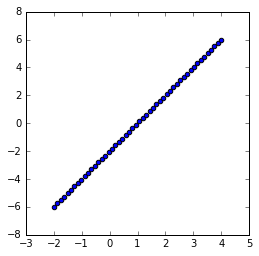

In [3]:
num_examples = 50
x=np.linspace(-2, 4, num_examples)
y=np.linspace(-6, 6, num_examples)
print x
plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.show()

## Generate random pertubation 

In [4]:
randnum=np.random.random([num_examples])
print randnum

[ 0.68389133  0.96061324  0.31006918  0.44969973  0.58643901  0.54036287
  0.63030274  0.22357323  0.43178665  0.00405485  0.96814614  0.74991416
  0.29610038  0.96418315  0.34380087  0.07851153  0.89147079  0.76227008
  0.33009881  0.48069362  0.10271948  0.96366282  0.84244382  0.55702053
  0.87475365  0.93432583  0.30932333  0.30990397  0.72662943  0.41507918
  0.72470957  0.43876465  0.34898195  0.59532073  0.72894576  0.9802369
  0.50282236  0.45954961  0.75200688  0.14963639  0.39793902  0.79774394
  0.42671942  0.60918027  0.51624742  0.93463646  0.98013077  0.64986071
  0.80938138  0.06271306]


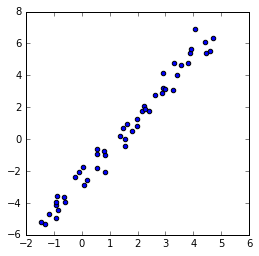

In [5]:
x += randnum  #an 1-d array with random numbers
y += np.random.random([num_examples])
plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.show()

## Add a constant element to input array

In [ ]:
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)
print x_with_bias

## Train a neural network with Gradient Descent 
The objective is minimizing L2 loss

In [ ]:
losses = []
training_steps = 50
learning_rate = 0.002

with tf.Session() as sess:
  # Set up all the tensors, variables, and operations.
  input = tf.constant(x_with_bias)
  target = tf.constant(np.transpose([y]).astype(np.float32))
  weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))
  
  tf.initialize_all_variables().run()
                      
  yhat = tf.matmul(input, weights)
  yerror = tf.sub(yhat, target)
  loss = tf.nn.l2_loss(yerror)
  
  update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
  for _ in range(training_steps):
    update_weights.run()
    losses.append(loss.eval())
    #print _  #It takes on value from 0 to 49
    #print losses  #this shows losses array keep increasing in size: [18] , [18, 13],...

  # Training is done, get the final values for the graphs
  betas = weights.eval()
  yhat = yhat.eval()


## Show the actual and predicted data points

In [ ]:
plt.figure(figsize=(4,4))

plt.scatter(x, y, alpha=.9)  #plot original x and y
plt.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6) #plot x and yhat

x_range = (-4, 6)
plt.plot(x_range, [betas[0] + a * betas[1] for a in x_range], "g", alpha=0.6)

plt.show()

## Plot the prediction error over time

In [ ]:
# Show the loss over time.
plt.figure(figsize=(4,4))

plt.plot(range(0, training_steps), losses)
#plt.set_ylabel("Loss")
#plt.set_xlabel("Training steps")

plt.show()

## Exercise: Build a neural network to predict room occupancy